In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
from google.colab import files
hw = files.upload()

Saving Height-Weight Data.csv to Height-Weight Data (1).csv


In [53]:
hw = pd.read_csv('Height-Weight Data.csv')

In [54]:
hw.head(6)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156


In [55]:
hw.shape

(3501, 2)

In [56]:
hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [57]:
hw.isnull().sum()

Height    0
Weight    0
dtype: int64

In [58]:
hw.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


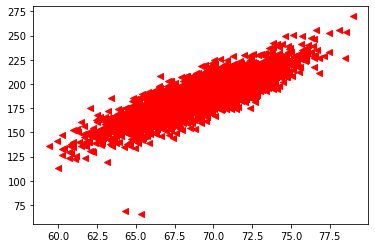

In [59]:
plt.scatter(hw['Height'], hw['Weight'], color='red', marker='<')

Text(0.5, 1.0, 'Height Weight Data')

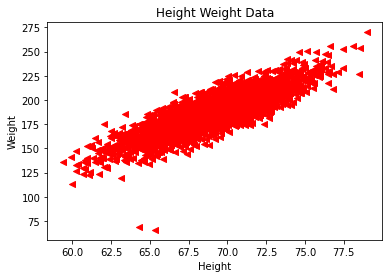

In [60]:
plt.scatter(hw['Height'], hw['Weight'], color='red', marker='<')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height Weight Data')

In [61]:
len(hw.Height)

3501

In [62]:
len(hw.Weight)

3501

In [63]:
hw.shape

(3501, 2)

In [64]:
x = hw[['Height']]  
y = hw['Weight']

In [65]:
x.head(5)

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [66]:
from sklearn.model_selection import train_test_split as tts

In [67]:
xtrain, xtest, ytrain, ytest = tts(x,y,train_size=.20,random_state=1)

In [68]:
xtrain.shape

(700, 1)

In [69]:
xtrain.head()

,Height
2342,68.360072
113,69.196858
245,65.498995
1439,68.356165
1022,70.079323


In [70]:
ytrain.head()

2342    176.413501
113     178.685546
245     156.869952
1439    204.358875
1022    189.595960
Name: Weight, dtype: float64

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr = LinearRegression()

In [73]:
lr.fit(xtrain ,ytrain)

LinearRegression()

In [74]:
lr.coef_

array([6.00033721])

In [75]:
lr.intercept_

-227.2500862417259

In [76]:
m = lr.coef_
c = lr.intercept_

In [77]:
x = 83
y = (m * x) + c
y

array([270.77790221])

In [78]:
lr.predict([[83]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([270.77790221])

In [79]:
lr.predict(hw[['Height']])

array([215.85691785, 185.46453202, 217.43553678, ..., 216.25013273,
       177.14876507, 209.20826208])

In [80]:
pd.Series(lr.predict(hw[['Height']]))

0       215.856918
1       185.464532
2       217.435537
3       203.159973
4       192.064254
           ...    
3496    188.554261
3497    196.026910
3498    216.250133
3499    177.148765
3500    209.208262
Length: 3501, dtype: float64

In [81]:
hw['Predicted Weight'] = pd.Series(lr.predict(hw[['Height']]))

In [82]:
hw.head()

,Height,Weight,Predicted Weight
0,73.847017,241.893563,215.856918
1,68.781904,162.310473,185.464532
2,74.110105,212.740856,217.435537
3,71.730978,220.042470,203.159973
4,69.881796,206.349801,192.064254


In [83]:
testData = lr.predict(xtest)

In [84]:
pd.Series(testData)

0       177.189569
1       190.133568
2       167.631577
3       178.897923
4       163.239270
           ...    
2796    193.913578
2797    182.418085
2798    198.098737
2799    191.350710
2800    191.151929
Length: 2801, dtype: float64

In [85]:
ytest

719     192.672676
2296    187.491501
3083    191.563495
1296    177.909685
2234    165.313807
           ...    
1952    195.717885
66      184.519391
1055    182.887948
1739    189.828313
2076    205.228706
Name: Weight, Length: 2801, dtype: float64

In [86]:
xtest['Predicted'] = lr.predict(xtest)

In [87]:
xtest.head(5)

,Height,Predicted
719,67.402821,177.189569
2296,69.560033,190.133568
3083,65.809912,167.631577
1296,67.687531,178.897923
2234,65.077902,163.239270


In [88]:
pred = testData

In [89]:
xtest['Ytest Data'] = ytest

In [90]:
xtest

,Height,Predicted,Ytest Data
719,67.402821,177.189569,192.672676
2296,69.560033,190.133568,187.491501
3083,65.809912,167.631577,191.563495
1296,67.687531,178.897923,177.909685
2234,65.077902,163.239270,165.313807
...,...,...,...
1952,70.189999,193.913578,195.717885
66,68.274191,182.418085,184.519391
1055,70.887487,198.098737,182.887948
1739,69.762879,191.350710,189.828313


In [91]:
from sklearn.metrics import mean_squared_error # mse
mse = mean_squared_error(ytest , pred) #testing error

In [92]:
mse

107.89605748882461

In [93]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest , pred) #testing error

In [94]:
mae

8.131085606734436

In [95]:
lr.predict([[90]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([312.78026268])

Text(0.5, 1.0, 'Height Weight Data')

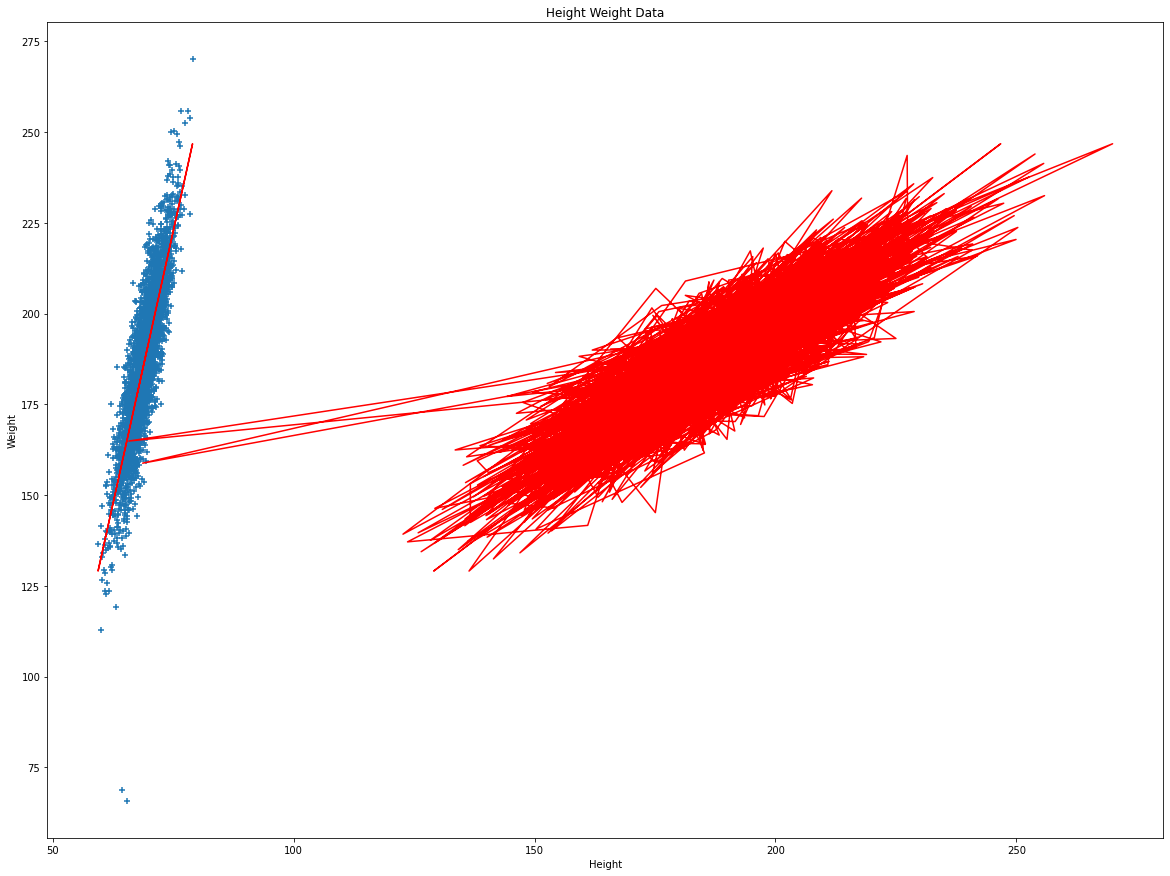

In [96]:
plt.figure(figsize=(20,15))
plt.scatter(hw['Height'] , hw['Weight'],marker='+') 
plt.plot(xtest, pred ,color='red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height Weight Data')

In [97]:
xtest.drop(columns=['Predicted', 'Ytest Data'])

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902
...,...
1952,70.189999
66,68.274191
1055,70.887487
1739,69.762879


In [98]:
lr.score(xtest, ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Predicted
- Ytest Data
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [101]:
lr.score(hw[['Height']], hw['Weight']) 

0.7323202258846292

In [102]:
lr.score(xtrain, ytrain)

0.7352341402135492